In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#svm 
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#load dataset 
path='/content/drive/MyDrive/ds_heart/heart_disease.csv'
df=pd.read_csv(path)

df.head()

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
#drop samples with missing values
df.isnull().sum()

age        0
sex        0
cp         0
testbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         4
thal       2
target     0
dtype: int64

In [ ]:
df.shape

(303, 14)

In [ ]:
data=df.dropna()

In [ ]:
data.head()

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
data.shape

(297, 14)

<Figure size 1440x1440 with 0 Axes>

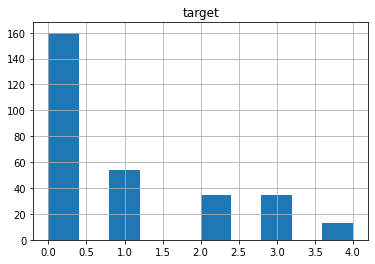

In [ ]:
plt.figure(figsize=(20,20))
data.hist('target')
plt.show('target')

In [ ]:
data['target'].value_counts() 

0    160
1     54
2     35
3     35
4     13
Name: target, dtype: int64

In [ ]:
data.describe()

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
from sklearn import preprocessing

x=data.drop('target', axis=1)
y=data['target']

In [ ]:
#get dummy variables
x=pd.get_dummies(x, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
#scale
standardScaler = StandardScaler()
columns_to_scale = ['age', 'testbps', 'chol', 'thalach', 'oldpeak']
x[columns_to_scale] = standardScaler.fit_transform(x[columns_to_scale])

In [ ]:
x.head()

,age,testbps,chol,thalach,oldpeak,sex_0,sex_1,cp_1,cp_2,cp_3,...,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.936181,0.750380,-0.276443,0.017494,1.068965,0,1,1,0,0,...,0,0,1,1,0,0,0,0,1,0
1,1.378929,1.596266,0.744555,-1.816334,0.381773,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,0,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
x_train.shape,x_test.shape

((237, 28), (60, 28))

In [ ]:
y_train

267    2
97     3
184    1
170    3
154    3
      ..
8      2
73     1
119    2
191    3
209    1
Name: target, Length: 237, dtype: int64

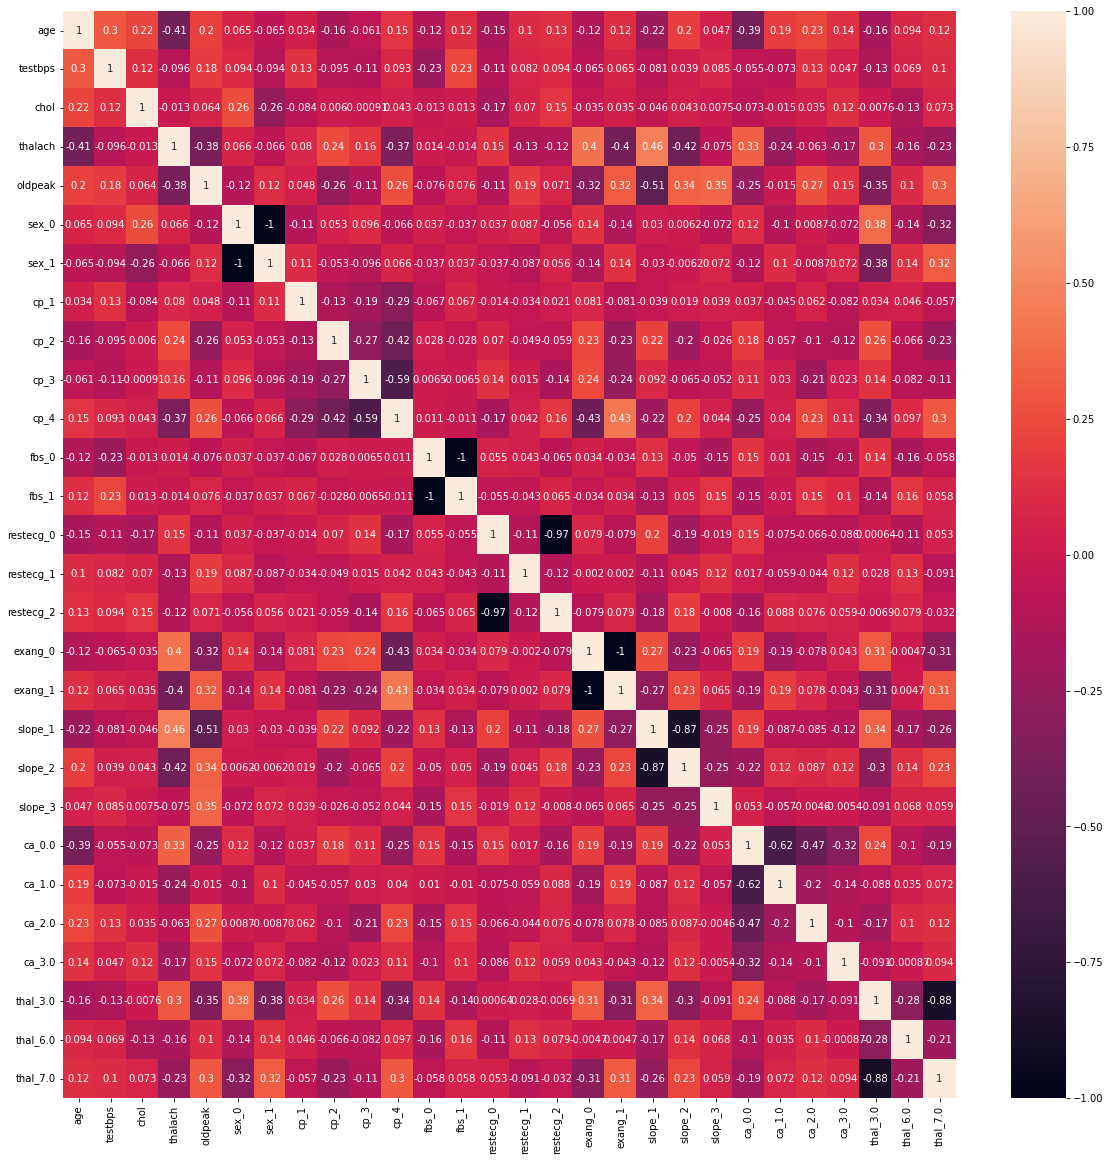

In [ ]:
##plot the correlation matrix##
plt.figure(figsize=(20,20))
cor = x_train.corr()
sns.heatmap(cor, vmin=-1,vmax=1, annot=True)
plt.show()

In [ ]:
#feature selection
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(x_train, 0.8)
len(set(corr_features))


6

In [ ]:
corr_features

{'exang_1', 'fbs_1', 'restecg_2', 'sex_1', 'slope_2', 'thal_7.0'}

In [ ]:
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)

,age,testbps,chol,thalach,oldpeak,sex_0,cp_1,cp_2,cp_3,cp_4,...,restecg_1,exang_0,slope_1,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0
56,-0.502750,0.468418,-0.276443,0.585108,-0.391318,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
118,0.936181,-0.095506,1.592176,-0.768432,0.639470,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
133,-0.392063,0.468418,0.262952,1.589347,-0.906712,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
24,0.604120,-0.095506,-0.796575,-0.768432,1.154864,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
265,-1.388246,0.242848,1.303215,-1.074070,0.639470,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
183,0.493433,2.611330,0.436329,-0.200818,2.701046,0,1,0,0,0,...,0,1,0,1,1,0,0,0,0,0
254,-1.277559,-0.941393,1.072045,1.371034,0.124076,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
43,0.493433,1.032342,-0.680990,0.323132,0.467672,0,0,0,1,0,...,0,1,1,0,1,0,0,0,1,0
282,0.050685,-0.208291,-0.815839,-0.855757,0.811268,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
252,1.046868,-0.208291,0.301480,-1.947322,-0.734914,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
model=svm.SVC()
model.fit(x_train,y_train)



SVC()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred)

In [ ]:
r=round(model.score(x_test,y_test),2)


In [ ]:
print('the model performance')
print('------------------------------')
print('MSE is {}'.format(mse))
print('R-squared score is {}'.format(r))

the model performance
------------------------------
MSE is 0.7833333333333333
R-squared score is 0.65


In [ ]:
model.score(x_test,y_test)

0.65

In [ ]:
predicted_output = model.predict(x_test)
predicted_output

array([0, 2, 0, 3, 1, 0, 0, 0, 3, 1, 0, 3, 0, 3, 0, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 2, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_output)
cm

array([[34,  1,  0,  0,  0],
       [ 7,  1,  1,  2,  0],
       [ 3,  2,  1,  1,  0],
       [ 1,  1,  1,  3,  0],
       [ 0,  0,  0,  1,  0]])

Text(24.0, 0.5, 'Truth or Actual Value')

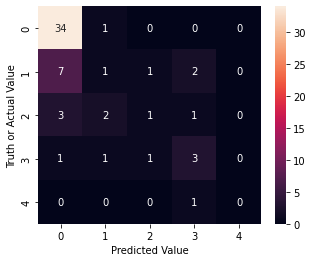

In [ ]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')